# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install plotly
# %pip install sklearn
# %pip install statsmodels

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_validate
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [3]:


#df_raw=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv')
df_raw=pd.read_csv('../data/raw/dataset.csv')


In [4]:
df_raw.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
df_raw.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
521,13277,40571,5585,13.765990,5999,14.786424,5666,13.965640,5255,12.952602,...,2860,14.2,13.5,15.0,4348,3.6,3.4,3.8,1092,5
962,20153,2508,317,12.639553,255,10.167464,233,9.290271,262,10.446571,...,170,13.5,12.2,14.7,268,3.6,3.4,4.0,72,6
2155,40053,4326,543,12.552011,572,13.222376,443,10.240407,479,11.072584,...,294,12.3,11.3,13.4,407,3.3,3.1,3.6,110,6
12,1025,23920,2704,11.304348,3045,12.729933,2911,12.169732,2557,10.689799,...,2161,19.1,18.1,20.1,3575,4.3,4.1,4.6,811,6
1683,31063,2608,264,10.122699,360,13.803681,291,11.157975,256,9.815951,...,156,10.9,9.9,11.8,230,3.2,3.0,3.5,68,6
2077,39073,28385,3280,11.555399,3592,12.654571,3204,11.287652,3099,10.917738,...,2372,13.5,12.3,14.6,2985,3.3,3.1,3.6,735,2
1720,31137,8996,1155,12.839040,1184,13.161405,981,10.904847,1016,11.293908,...,470,10.3,9.3,11.2,706,3.0,2.8,3.3,208,6
433,13099,10247,1348,13.155070,1442,14.072411,1208,11.788816,1086,10.598224,...,892,18.9,17.9,20.0,1454,4.7,4.4,5.0,359,6
720,18051,33452,4291,12.827335,4296,12.842281,3987,11.918570,4011,11.990314,...,2476,12.1,11.1,13.1,3095,3.1,2.8,3.3,782,6
324,12013,14587,1529,10.481936,1688,11.571948,1876,12.860766,1989,13.635429,...,1349,14.3,13.4,15.1,1665,3.6,3.4,3.9,422,6


In [7]:
list(df_raw.columns)

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [8]:
df_raw.dropna()
#no hay valores nulos

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [9]:
df = df_raw.copy()



Por el diccionario del conjunto de datos, podemos ver que hay un par de variables relacionadas con los recursos de salud que se pueden usar como la variable objetivo.


Una de las posibles variables objetivo es: Total Specialist Physicians (2019)


In [10]:
# de X borramos las variables que podrian usarse de target
X= df.drop(['CNTY_FIPS','fips','Active Physicians per 100000 Population 2018 (AAMC)','Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)','Active General Surgeons per 100000 Population 2018 (AAMC)','Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)','Total nurse practitioners (2019)','Total physician assistants (2019)','Total physician assistants (2019)','Total Hospitals (2019)','Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)','STATE_NAME','COUNTY_NAME','ICU Beds_x','Total Specialist Physicians (2019)'], axis=1)
y=df['Total Specialist Physicians (2019)']

# Define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [11]:
df_train = pd.concat((X_train, y_train), axis=1)

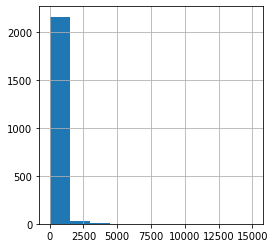

In [12]:
df_train['Total Specialist Physicians (2019)'].hist(figsize=(4,4))
plt.show()

In [13]:
df_train['Total Specialist Physicians (2019)'].describe()

count     2198.000000
mean       160.478916
std        539.102238
min          0.111759
25%         14.818960
50%         36.101784
75%        100.686394
max      15014.048660
Name: Total Specialist Physicians (2019), dtype: float64

In [14]:
fig = px.box(df_train, x="Total Specialist Physicians (2019)")
fig.show()

In [15]:
n = len(df_train)
n_229 = len(df_train[df_train['Total Specialist Physicians (2019)']>229])

print(f'El porcetaje de paises con mas de 229 Total Specialist Physicians (2019) son {round((n_229/n)*100,1)}%')

El porcetaje de paises con mas de 229 Total Specialist Physicians (2019) son 13.6%


- Total Specialist Physicians (2019) tiene una distribución asimétrica hacia la derecha.
- Hay algunos pocos paises con un alto número de médicos en total.
- El limite superior del IQR es 229. Para el 13,4% de los paises, el valor de esta variable es superior a este umbral.

In [16]:
df_train[df_train['Total Specialist Physicians (2019)']>229].describe()

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Total Specialist Physicians (2019)
count,3.000000e+02,3.000000e+02,300.000000,3.000000e+02,300.000000,3.000000e+02,300.000000,3.000000e+02,300.000000,3.000000e+02,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,5.328469e+05,6.561953e+04,12.137944,6.826059e+04,12.950314,7.611234e+04,14.047755,7.375174e+04,13.163334,6.714445e+04,...,11.127667,10.316000,11.948000,45843.763333,2.967667,2.783333,3.173000,12202.346667,2.580000,876.528327
std,7.800045e+05,9.607723e+04,1.766734,9.733570e+04,1.540271,1.177133e+05,2.932588,1.158434e+05,1.767292,1.030789e+05,...,1.987352,1.886923,2.083996,71270.463179,0.423855,0.388103,0.456434,18531.384854,0.976445,1234.535615
min,9.579600e+04,1.086700e+04,6.123850,1.173600e+04,6.867390,1.097300e+04,7.840625,1.109300e+04,7.280619,1.131100e+04,...,6.100000,5.500000,6.700000,8182.000000,2.000000,1.900000,2.200000,2249.000000,1.000000,231.329584
25%,2.000182e+05,2.402275e+04,11.089263,2.493425e+04,12.122781,2.535975e+04,12.102918,2.487550e+04,11.993572,2.314575e+04,...,9.700000,8.975000,10.400000,17333.250000,2.600000,2.500000,2.800000,4661.250000,2.000000,317.376906
50%,3.243350e+05,4.029100e+04,12.123225,4.399450e+04,12.902161,4.744550e+04,13.431992,4.325650e+04,13.048180,3.928150e+04,...,11.000000,10.200000,11.800000,27543.000000,3.000000,2.800000,3.200000,7216.500000,3.000000,486.581498
75%,6.018620e+05,7.395825e+04,13.022411,7.639600e+04,13.841988,8.252275e+04,15.212087,8.238425e+04,14.157943,7.657650e+04,...,12.600000,11.700000,13.400000,49032.500000,3.200000,3.000000,3.400000,13395.750000,3.000000,941.992322
max,1.010552e+07,1.208253e+06,18.728795,1.239139e+06,18.799350,1.557073e+06,28.507925,1.501844e+06,20.760892,1.350076e+06,...,18.000000,16.700000,19.300000,952335.000000,4.400000,4.000000,4.800000,237766.000000,5.000000,15014.048660


In [17]:
df_train[df_train['Total Specialist Physicians (2019)']>229].describe()

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Total Specialist Physicians (2019)
count,3.000000e+02,3.000000e+02,300.000000,3.000000e+02,300.000000,3.000000e+02,300.000000,3.000000e+02,300.000000,3.000000e+02,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,5.328469e+05,6.561953e+04,12.137944,6.826059e+04,12.950314,7.611234e+04,14.047755,7.375174e+04,13.163334,6.714445e+04,...,11.127667,10.316000,11.948000,45843.763333,2.967667,2.783333,3.173000,12202.346667,2.580000,876.528327
std,7.800045e+05,9.607723e+04,1.766734,9.733570e+04,1.540271,1.177133e+05,2.932588,1.158434e+05,1.767292,1.030789e+05,...,1.987352,1.886923,2.083996,71270.463179,0.423855,0.388103,0.456434,18531.384854,0.976445,1234.535615
min,9.579600e+04,1.086700e+04,6.123850,1.173600e+04,6.867390,1.097300e+04,7.840625,1.109300e+04,7.280619,1.131100e+04,...,6.100000,5.500000,6.700000,8182.000000,2.000000,1.900000,2.200000,2249.000000,1.000000,231.329584
25%,2.000182e+05,2.402275e+04,11.089263,2.493425e+04,12.122781,2.535975e+04,12.102918,2.487550e+04,11.993572,2.314575e+04,...,9.700000,8.975000,10.400000,17333.250000,2.600000,2.500000,2.800000,4661.250000,2.000000,317.376906
50%,3.243350e+05,4.029100e+04,12.123225,4.399450e+04,12.902161,4.744550e+04,13.431992,4.325650e+04,13.048180,3.928150e+04,...,11.000000,10.200000,11.800000,27543.000000,3.000000,2.800000,3.200000,7216.500000,3.000000,486.581498
75%,6.018620e+05,7.395825e+04,13.022411,7.639600e+04,13.841988,8.252275e+04,15.212087,8.238425e+04,14.157943,7.657650e+04,...,12.600000,11.700000,13.400000,49032.500000,3.200000,3.000000,3.400000,13395.750000,3.000000,941.992322
max,1.010552e+07,1.208253e+06,18.728795,1.239139e+06,18.799350,1.557073e+06,28.507925,1.501844e+06,20.760892,1.350076e+06,...,18.000000,16.700000,19.300000,952335.000000,4.400000,4.000000,4.800000,237766.000000,5.000000,15014.048660


In [18]:
df_corr=df_train.corr()
df_corr[['Total Specialist Physicians (2019)']].sort_values(by="Total Specialist Physicians (2019)", ascending=False)[:30]

,Total Specialist Physicians (2019)
Total Specialist Physicians (2019),1.000000
50-59,0.978512
60-69,0.978010
Population Aged 60+,0.975817
Total Population,0.975186
county_pop2018_18 and older,0.974773
Civilian_labor_force_2018,0.973831
Employed_2018,0.973795
POP_ESTIMATE_2018,0.972774
TOT_POP,0.972774


En general, podemos ver que el número 'Total Specialist Physicians (2019)' tiene una alta correlación con las variables que se miden en número de personas. 

Esto nos indica que los paises con más población tienen más especialistas.

In [19]:
# Model 1 with pre-defined alpha=10


scaler = StandardScaler() # to apply Lasso we have to scale the data

train_scaler = scaler.fit(X_train) # fit the scaler to train data

data_esc = train_scaler.transform(X_train) # transform X_train

model = Lasso(alpha=10) 

model.fit(data_esc, y_train) # fit the data to the Lasso model with alpha=10

print('Score in train data - Lasso alpha=10:', model.score(data_esc, y_train))

# Predict in test dataset and get score

test_esc = train_scaler.transform(X_test)

print('Score in test data - Lasso alpha=10:', model.score(test_esc, y_test)) 




Score in train data - Lasso alpha=10: 0.972203374505767
Score in test data - Lasso alpha=10: 0.9311124177144584


In [20]:
# The pipeline first standardizes data and then applies Lasso with alpha=10

pipe = make_pipeline(StandardScaler(), Lasso(alpha=10))
pipe.fit(X_train, y_train)
print(pipe[1].coef_, pipe[1].intercept_) #pipe[1] hace referencia a Lasso

[  0.           0.           0.           0.           0.
   0.          -0.           0.          -0.           0.
  -0.          29.80286742   0.           0.           0.
   0.          -0.           0.           0.           0.
   0.           0.          -0.           0.          -0.
   7.76335635   0.          -3.23432157  -0.           0.
  -0.           0.         -21.75285636  47.78459329  -0.
  -0.           0.           0.          -0.          -0.
   0.         246.54582896   0.         207.82479335  -0.
  -0.          -0.           0.           0.          -0.
  -0.          -0.           0.           3.2946217    0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          -0.          -0.          -0.           0.
  -0.          -0.          -0.           0.          -0.
  -0.          -0.           0.          -0.          -0.
  -0.           0.          -0.          -0.          -0.
   0.         

In [21]:
# List of Lasso coefficients 

coef_list=pipe[1].coef_
# Location of Lasso coefficients

loc=[i for i, e in enumerate(coef_list) if e != 0]
loc

[11, 25, 27, 32, 33, 41, 43, 53]

In [22]:
# Features whose coefficiet is different from zero

col_name=df_train.columns
col_name[loc]

Index(['50-59', 'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop',
       'N_POP_CHG_2018', 'GQ_ESTIMATES_2018',
       'High school diploma only 2014-18',
       'Bachelor's degree or higher 2014-18', 'CI90LBINC_2018'],
      dtype='object')

In [23]:
print("Score Lasso with alpha=10 - train: ", pipe.score(X_train, y_train))
print("Score Lasso with alpha=10 - test: ", pipe.score(X_test, y_test)) 

Score Lasso with alpha=10 - train:  0.972203374505767
Score Lasso with alpha=10 - test:  0.9311124177144584


In [24]:
# Model 2 with CV to select alpha

pipe2 = make_pipeline(StandardScaler(), Lasso())
pipe2.get_params().keys()
params={
    'lasso__fit_intercept':[True,False],
    'lasso__alpha':10.0**np.arange(-2, 6, 1)
}

#setting up the grid search
gs=GridSearchCV(pipe2,params,n_jobs=-1,cv=5)

#fitting gs to training data
gs.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.112e+07, tolerance: 3.562e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.822e+06, tolerance: 6.005e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.459e+06, tolerance: 5.540e+04

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
                         'lasso__fit_intercept': [True, False]})

In [25]:
#building a dataframe from cross-validation data
df_cv_scores=pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score')
#selecting specific columns to create a view
df_cv_scores[['params','split0_test_score', 'split1_test_score', 'split2_test_score',\
       'split3_test_score', 'split4_test_score', 'mean_test_score',\
       'std_test_score', 'rank_test_score']].head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,"{'lasso__alpha': 1.0, 'lasso__fit_intercept': ...",0.966656,0.977075,0.981190,0.924214,0.939213,0.957670,0.022228,1
6,"{'lasso__alpha': 10.0, 'lasso__fit_intercept':...",0.967494,0.975212,0.983604,0.910029,0.939499,0.955168,0.027001,2
2,"{'lasso__alpha': 0.1, 'lasso__fit_intercept': ...",0.960947,0.970127,0.973965,0.923241,0.945051,0.954666,0.018606,3
0,"{'lasso__alpha': 0.01, 'lasso__fit_intercept':...",0.957622,0.974524,0.963169,0.915014,0.941428,0.950351,0.020639,4
8,"{'lasso__alpha': 100.0, 'lasso__fit_intercept'...",0.952883,0.956215,0.935654,0.837115,0.901084,0.916590,0.044289,5


In [26]:
#checking the selected permutation of parameters
gs.best_params_

{'lasso__alpha': 1.0, 'lasso__fit_intercept': True}

In [27]:
#checking how well the model does on the test-set
print('Score with alpha selected by CV - test:', gs.score(X_test,y_test))

Score with alpha selected by CV - test: 0.9203291410708176


Score mas bajo que en el modelo 1

Ahora dejamos el intercept default

In [28]:
scores_dict = {'alpha':10.0**np.arange(-2, 6, 1), 'mean_train_scores': list(), 'mean_cv_scores': list()}

for alpha in scores_dict['alpha']:
  pipe_lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha)) 
  scores=cross_validate(pipe_lasso, X_train, y_train, return_train_score=True)
  scores_dict['mean_train_scores'].append(scores['train_score'].mean())
  scores_dict['mean_cv_scores'].append(scores['test_score'].mean())


pd.DataFrame(scores_dict)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.822e+06, tolerance: 6.005e+04

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.333e+06, tolerance: 5.087e+04

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.240e+06, tolerance: 3.171e+04

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent

,alpha,mean_train_scores,mean_cv_scores
0,0.01,0.986030,0.950351
1,0.10,0.985629,0.954666
2,1.00,0.980611,0.957670
3,10.00,0.971946,0.955168
4,100.00,0.927567,0.916590
5,1000.00,0.000000,-0.005464
6,10000.00,0.000000,-0.005464
7,100000.00,0.000000,-0.005464


In [29]:
# Features whose coefficiet is different from zero selected with Model 2
model2 = gs.best_estimator_

# fit model with the hiperaparameters selected by CV
model2.fit(X_train, y_train)

print(model2[1].coef_, model2[1].intercept_) 

[   0.            0.            5.67806943    0.            0.
    0.           -6.29105947   -0.           -6.39942043   -0.
   -1.01483251  256.14905221    0.66794889    0.            0.
   -0.           -0.            0.            0.            0.
    0.67122614    0.           -0.            0.           -0.
   60.95923335   -0.          -33.783957      0.            0.
   -0.            0.          -37.1274817    80.19903118    0.
   -1.45814621    0.            4.47736886    0.            0.
  -68.54665187  286.80549976   -0.           91.57758134    6.40634495
   -0.           -0.            0.          -28.19260919    0.
    0.            0.            1.66584682   16.28624119    0.
    0.            0.           -0.            1.14436332    0.
  -12.59525066    0.            0.            0.           -0.
    0.            0.            0.            0.           -0.
   -0.           -0.           -0.           -0.            0.
    0.            0.           -0.            0

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.754e+05, tolerance: 6.385e+04



In [30]:
# get coefficients
coef_list=model2[1].coef_

# Location of Lasso coefficients
loc2=[i for i, e in enumerate(coef_list) if e != 0]

# Features whose coefficiet is different from zero
col_name=df_train.columns
print(col_name[loc2])

Index(['0-9 y/o % of total pop', '20-29 y/o % of total pop',
       '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59',
       '50-59 y/o % of total pop', '% White-alone', 'Asian-alone pop',
       'Hawaiian/Pacific Islander-alone pop', 'N_POP_CHG_2018',
       'GQ_ESTIMATES_2018', 'R_death_2018', 'R_INTERNATIONAL_MIG_2018',
       'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'Bachelor's degree or higher 2014-18',
       'Percent of adults with less than a high school diploma 2014-18',
       'POVALL_2018', 'MEDHHINC_2018', 'CI90LBINC_2018',
       'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018',
       'diabetes_number'],
      dtype='object')


In [31]:
# OLS with StatsModels and the selected features

X_ols = X_train[col_name[loc2]]

X_ols_int = sm.add_constant(X_ols) 

modelo_ols = sm.OLS(y_train, X_ols_int)

results = modelo_ols.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Total Specialist Physicians (2019)   R-squared:                       0.982
Model:                                            OLS   Adj. R-squared:                  0.982
Method:                                 Least Squares   F-statistic:                     5134.
Date:                                Sat, 20 Aug 2022   Prob (F-statistic):               0.00
Time:                                        16:54:49   Log-Likelihood:                -12533.
No. Observations:                                2198   AIC:                         2.511e+04
Df Residuals:                                    2174   BIC:                         2.525e+04
Df Model:                                          23                                         
Covariance Type:                            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                             70.8859     45.671      1.552      0.121     -18.677     160.449
0-9 y/o % of total pop                                             2.8517      1.043      2.734      0.006       0.806       4.897
20-29 y/o % of total pop                                          -3.4878      0.810     -4.308      0.000      -5.076      -1.900
30-39 y/o % of total pop                                          -4.5733      1.524     -3.000      0.003      -7.562      -1.584
40-49 y/o % of total pop                                          -2.1090      1.742     -1.211      0.226      -5.526       1.308
50-59                                                              0.0107      0.001     15.922      0.000       0.009       0.012
50-59 y/o % of total pop                                          -1.7509      1.867     -0.938      0.348      -5.412       1.910
% White-alone                                                      0.0305      0.117      0.260      0.795      -0.199       0.260
Asian-alone pop                                                    0.0020      0.000     15.326      0.000       0.002       0.002
Hawaiian/Pacific Islander-alone pop                               -0.0165      0.001    -17.831      0.000      -0.018      -0.015
N_POP_CHG_2018                                                    -0.0133      0.001    -19.720      0.000      -0.015      -0.012
GQ_ESTIMATES_2018                                                  0.0136      0.001     18.369      0.000       0.012       0.015
R_death_2018                                                      -1.3250      0.798     -1.661      0.097      -2.889       0.239
R_INTERNATIONAL_MIG_2018                                           3.1488      0.810      3.888      0.000       1.560       4.737
Less than a high school diploma 2014-18                           -0.0023      0.000     -7.149      0.000      -0.003      -0.002
High school diploma only 2014-18                                   0.0063      0.000     20.759      0.000       0.006       0.007
Bachelor's degree or higher 2014-18                                0.0003      0.000      1.698      0.090   -4.54e-05       0.001
Percent of adults with less than a high school diploma 2014-18     1.4892      0.354      4.208      0.000       0.795       2.183
POVALL_2018                                                       -0.0002      0.000     -0.767      0.443      -0.001       0.000
MEDHHINC_2018            

In [33]:
# Grabamos el modelo OLS

filename='../models/final_ols_model.sav'
pickle.dump(modelo_ols, open(filename, 'wb'))

In [34]:
# GRabamos el modelo LASSO

model_lasso = gs.best_estimator_

filename='../models/final_lasso_model.sav'
pickle.dump(model_lasso, open(filename, 'wb'))